# Create a New Notebook in Colab

Within the Colab environment, it is easy to create a new notebook. Open Google Colab in a browser (if not already open). From the pop-up window, click `New notebook`. If already in the Colab environment, click `File` in the top-left menu under `Welcome to Colaboratory`. Click `New notebook` from the drop-down menu. A code cell is now ready for executing Python code! Add code or text cells by clicking the `+ Code` or `+ Text` button. For more options, click Insert from the main menu

For an introduction to Colab, peruse

   https://colab.research.google.com/

To create your first piece of code, add the following in the code cell:
```
10 * 5
```
To execute the code, click the `little arrow to the left`. The output from the code cell shows the result of the multiplication.

In [ ]:
10*5

50

# Import the TensorFlow Library

Before we can do anything in TensorFlow, we must import the appropriate Python library. It is common practice to alias the TensorFlow library as tf. So go ahead and execute the import in a new code cell:
```
import tensorflow as tf
```

In [ ]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB RAM (as of this writing). It’s very easy to enable the GPU in a Colab notebook:
1. Click Runtime in the top-left menu.
2. Click Change runtime type from the drop-down menu.
3. Choose GPU from the Hardware accelerator drop-down menu.
4. Click Save.

---
**Note** the GPU must be enabled in each notebook. But it only has to be enabled once.

---

In [ ]:
tf.__version__, tf.test.gpu_device_name()

2021-11-18 13:32:22.523166: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-18 13:32:23.405707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 4630 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:17:00.0, compute capability: 7.5
2021-11-18 13:32:23.406402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:1 with 4554 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:65:00.0, compute capability: 7.5


('2.7.0', '/device:GPU:0')

If ‘/device:GPU:0’ is displayed, the GPU is active. If ‘ ’ is displayed, the regular CPU is active.

---
**Tip** if you get the error NAME ‘TF’ IS NOT DEFINED, re-execute the code to import the tensorFlow library! For some reason, we sometimes have to re-execute the tensorFlow library import in Colab. we don’t know why this is the case.

---

Colab is a wonderful tool to work with TensorFlow. However, it does have its limitations. Colab applies dynamic resource provisioning. In order to be able to offer computational resources for free, Colab dynamically adjusts usage limits and hardware availability on the fly. So available resources in Colab vary over time to accommodate fluctuations in demand. In a nutshell, this means that Colab may not always be available for use! One solution is to move to Colab Pro for a small monthly fee. As of this writing, the cost is $9.99/month.

---
**Tip** For serious tensorFlow users, we recommend moving to Colab pro. it is not free, but it is quite inexpensive. From our experience, it is more powerful than the free version, and it is more readily available.

---


# Create a TensorFlow Dataset

Create a dataset of three tensors with six elements each:


In [ ]:
data = [[8, 5, 7, 3, 9, 1],
        [0, 3, 1, 8, 5, 7],
        [9, 9, 9, 0, 0, 7]]
dataset = tf.data.Dataset.from_tensor_slices(data)
dataset

<TensorSliceDataset shapes: (6,), types: tf.int32>

Create the dataset. Transform it into a `tf.data.Dataset` object with the `from_tensor_slices()` method. The shape of the dataset is (6,), which means that each row contains six scalar values.

---
**Tip** we highly recommend testing small pieces of code in their own code cells to reduce debugging time and effort.

---

# Consume the Dataset
Iterate over the dataset to display tensor information:

In [ ]:
for i, row in enumerate(dataset):
  print ('row ' + str(i), ':', end=' ')
  print (row.numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


Since the `tf.data.Dataset` object is created with `from_tensor_slices()`, it is a Python iterable that can be consumed with a for loop. With TensorFlow datasets, use the `numpy()` method to explicitly convert each tensor to a NumPy array.

Alternatively, we can use the `take()` method to iterate over a TensorFlow dataset:


In [ ]:
for i, e in enumerate(dataset.take(3)):
  print ('row ' + str(i), ':', end=' ')
  print (e.numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


We add 3 as a parameter in the `take()` method to grab three examples. Another option is to create a Python iterator:

In [ ]:
i= 0
it = iter(dataset)
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())
i += 1
print ('row ' + str(i), ':', end=' ')
print (next(it).numpy())

row 0 : [8 5 7 3 9 1]
row 1 : [0 3 1 8 5 7]
row 2 : [9 9 9 0 0 7]


Initialize a counter variable. Use the iter() method to create an iterator. Consume the iterator with the next() method and display the results.

#Dataset Structure

The `element_spec` property of tf.data.Dataset allows inspection of the dataset. The propertyreturns a nested structure of the `tf.TypeSpec` object that matches the structure of the element. The nested structure may be a single component, a tuple of components, or a nested tuple of components

Inspect the dataset:

In [ ]:
dataset.element_spec

TensorSpec(shape=(6,), dtype=tf.int32, name=None)

Shape and datatype are displayed.
Alternatively, we can just display the `tf.data.Dataset` object:

In [ ]:
dataset

<TensorSliceDataset shapes: (6,), types: tf.int32>

# Create a Dataset from Memory

If all of your input data fits in memory, the simplest way to create a TensorFlow dataset
is to convert it to `tf.Tensor` objects with the `from_tensor_slices()` method. Now, we are going to build a pipeline. We begin by loading a clean dataset. We continue by scaling the feature data images. Scaling (or feature scaling) is a method used to normalize the range of independent variables or features of a dataset. Scaling is important because
ML models tend to work better if the pixels that make up each image are smaller in size. We inspect the data with code and visualizations. Next, we configure the pipeline for performance. We end by creating a model, training the model, and evaluating the model.

## Load and Inspect Data
To build an input pipeline, we need a dataset. Since the focus is on building a TensorFlow consumable pipeline, we work with cleansed datasets.
Load training and test data in memory:

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

Download Fashion-MNIST data into training and test sets. We use training data to teach the model. We use test data to evaluate the model. Fashion-MNIST is a dataset of Zalondo’s article images. It contains 60,000 training and 10,000 test examples. The dataset is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

Inspect :

In [ ]:
type(train[0]), type(train[1])

(numpy.ndarray, numpy.ndarray)

**Training and test sets are tuples** where the first tuple element contains feature images and the second contains corresponding labels. **Both datasets (features and labels) are NumPy arrays**.

Load images and labels into variables:

In [ ]:
train_img, train_lbl = train
test_img, test_lbl = test

For example, [0] images , [4000] image, [12] row, [20] column is:

In [ ]:
print(train[0][4000][12][20])

187


or:

In [ ]:
print(train_img[4000][12][20])

187


and the [1] label for [4000] image is:

In [ ]:
print(train[1][4000])

8


or

In [ ]:
print(train_lbl[4000])

8


By separating images and labels from the respective datasets, we can more easily process images and labels as needed.

Verify shapes:

In [ ]:
print ('train:', train_img.shape, train_lbl.shape)
print ('test:', test_img.shape, test_lbl.shape)

train: (60000, 28, 28) (60000,)
test: (10000, 28, 28) (10000,)


Training data consists of 60,000 28 × 28 feature images and 60,000 labels. Test data consists of 10,000 28 × 28 feature images and 10,000 labels.
# Scale and Create the tf.data.Dataset
Scale data for efficient processing and create the training (train_ds) and test (test_ds) sets:

In [ ]:
train_image = train_img / 255.0
test_image = test_img / 255.0
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_image, train_lbl))
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_image, test_lbl))

Get slices of the NumPy arrays in the form of `tf.data.Dataset()` objects with `from_tensor_slices()`. Feature image pixel values are typically integers that range from 0 to 255. To scale, divide feature images by 255 to get pixel values that range from 0 to 1.

Scaling images is a critical preprocessing step because deep learning models train faster on smaller images. Moreover, many deep learning model architectures require that images are the same size. But raw images tend to vary in size.

Inspect training and test tensors:

In [ ]:
train_ds, test_ds

(<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>,
 <TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>)

Both datasets are `TensorSliceDataset` objects, which means that they are iterators. An **iterator** is an object that contains a countable number of examples that can be traversed with the `next()` method.

Display the **first label** from the training set:

In [ ]:
next(train_ds.as_numpy_iterator())[1]

9

Each example in the training set contains an image matrix and its corresponding label. The `next()` method returns a tuple with the first image matrix and its label in positions 0 and 1 in the tuple respectively.

Display **ten labels** from the training set:

In [ ]:
next(train_ds.batch(10).as_numpy_iterator())[1]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

The `batch()` method takes n examples from a dataset. Display all 60,000 labels from the training set:

In [ ]:
labels = next(train_ds.batch(60_000).as_numpy_iterator())[1]
labels, len(labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

Display the first image from the training set:

In [ ]:
next(train_ds.as_numpy_iterator())[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Verify that the first image is a 28 × 28 matrix:

In [ ]:
arrays = len(next(train_ds.as_numpy_iterator())[0])
pixels = len(next(train_ds.as_numpy_iterator())[0][0])
arrays, pixels

(28, 28)

or

In [ ]:
next(train_ds.take(1).as_numpy_iterator())[0].shape

(28, 28)

To find dimensions of a matrix (tensor) in Python, the height (or rows) is `len(matrix)`, and the width (or columns) is `len(matrix[0])`.

## Verify Scaling
Display a pre-scaled tensor from the training set:


In [ ]:
train_img[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

Display fifth image

Display the same tensor after scaling:

In [ ]:
train_image[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

or:

In [ ]:
next(train_ds.take(5).as_numpy_iterator())[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Voilà! The pixels are scaled between 0 and 1.

## Check Tensor Shape
Check shapes:

In [ ]:
for img, lbl in train_ds.take(5):
  print ('image shape:', img.shape, end=' ')
  print ('label:', lbl.numpy())

image shape: (28, 28) label: 9
image shape: (28, 28) label: 0
image shape: (28, 28) label: 0
image shape: (28, 28) label: 3
image shape: (28, 28) label: 0


Fashion-MNIST images are equally sized. So we don’t have to resize them!
## Inspect Tensors
Check train and test tensors:


In [ ]:
train_ds, test_ds

(<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>,
 <TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>)

All is well.

## Preserve the Shape
Assign a variable to the feature image shape for use in the model:

In [ ]:
for img, label in train_ds.take(1):
  img.numpy().shape
img_shape = img.numpy().shape
img_shape

(28, 28)

## Visualize
Visualize an element from the training set:


label= 9


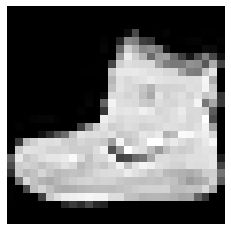

In [ ]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img.numpy(), cmap='gray')
plt.axis('off')
plt.grid(b=None)
print('label=',label.numpy())

or:

label= tf.Tensor(9, shape=(), dtype=uint8)


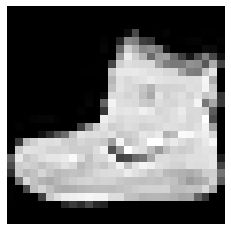

In [ ]:
import matplotlib.pyplot as plt

for img, label in train_ds.take(1):
  plt.imshow(img, cmap='gray')
plt.axis('off')
plt.grid(b=None)
print('label=',label)


Although Fashion-MNIST images are grayscale, we can bring them to life with colors using predefined color maps built into the matplotlib library. A **color map** is an array of colors used to map pixel data to actual color values.

Peruse the following URL for detailed information about matplotlib color maps:
   https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## Define Class Labels
From our experience working with Fashion-MNIST, we know the corresponding labels:

In [ ]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
                'Ankle boot']

## Convert a Numerical Label to a Class Label
Labels are numerical in the `tf.data.Dataset` that we just loaded, but we can display the corresponding class name with the `class_labels` list we just created:

In [ ]:
for _, label in train_ds.take(1):
  print ('numerical label:', label.numpy())
  print ('string label:', class_labels[label.numpy()])

numerical label: 9
string label: Ankle boot


Take an example and display the label as a numerical value and string value.

## Create a Plot of Examples from the Dataset
Take some images and labels from the training set:


Create a function to display a grid of examples as shown

In [ ]:
def display_grid(feature, target, n_rows, n_cols, cl):
  plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(feature[index], cmap='twilight',
                 interpolation='nearest')
      plt.axis('off')
      plt.title(cl[target[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)


Invoke the function. `tf.squeeze` removes dimensions of size 1 from the shape of a tensor.



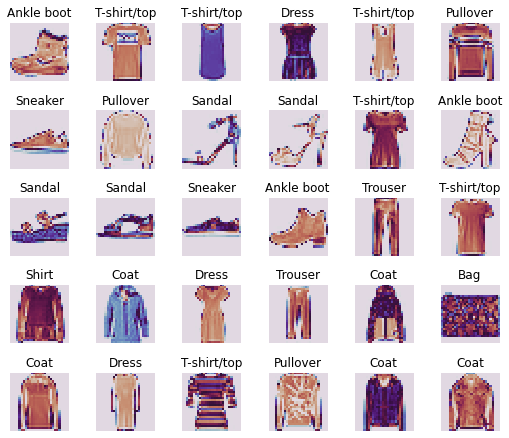

In [ ]:
rows, cols = 5, 6
num = rows*cols
images, labels = [], []
for feature, label in train_ds.take(num):
  images.append(tf.squeeze(feature.numpy()))
  labels.append(label.numpy())
display_grid(images, labels, rows, cols, class_labels)

It’s always a good idea to check out the dataset to see if it is as we expect.
## Build the Consumable Input Pipeline
We say consumable `input pipeline because the actual pipeline starts when data is actually acquired. We use this terminology to emphasize the importance of transforming the training and test datasets into efficient tensors for TensorFlow model consumption.

We see examples that refer to this part as building the input pipeline, but the input pipeline encompasses the entire workflow from raw data to generalized model. In later chapters, we drop the word “consumable.”

## Configure the Dataset for Performance
Use buffered prefetching and caching to improve I/O performance. Shuffle data to improve model performance.

**Prefetching** is a function in the tf.data API that overlaps data preprocessing and model execution while training, which reduces the overall training time of a model. To perform this operation, add the `tf.Dataset.prefetch` transformation to the input pipeline.

Add the `tf.data.Dataset.cache` transformation to the pipeline to **keep images in memory** after they’re loaded off disk during the first epoch, which ensures that the dataset doesn’t become a bottleneck during training. So caching saves operations (e.g., file opening, data reading) from being executed during each epoch.

**Shuffling** data serves the purpses of reducing variance (ensuring that a model remains general) and reducing overfitting. An obvious case for shuffling is when data is sorted by class (or target). We shuffle to ensure that the training, test, and validation sets are representative of the overall distribution of the data. To perform this operation, add the `tf.Dataset.shuffle` transformation to the pipeline.

Training is always performed on batches of training data and labels. Doing so helps the algorithm converge. **Batch** is when all of a dataset is used to compute the gradient during one iteration. **Mini-batch** is when a subset of a dataset is used to compute mthe gradient during one iteration. To perform this operation, add the `tf.Dataset.batch` transformation to the pipeline.

The *batch dimension* is typically the first dimension of data tensors. So a tensor of shape [100, 192, 192, 3] contains 100 images of 192 × 192 pixels with three values per pixel (RGB) in each batch. The **RGB color model** is an additive color model in which red, green, and blue lights are added together in various ways to reproduce a broad array of colors.

Build the consumable input pipeline:


In [ ]:
BATCH_SIZE = 128
SHUFFLE_SIZE = 5000

train_f = train_ds.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
train_fm = train_f.cache().prefetch(1)
test_f = test_ds.batch(BATCH_SIZE)
test_fm = test_f.cache().prefetch(1)

*Shuffle training data*. Shuffling randomizes training data, which ensures that each data element is independent from other data elements during each training epoch. Learning models tend to perform best when exposed to independently sampled data.

*Batch, cache, and prefetch training and test data*. Adding the `cache() transformation increases performance because data is read and written only once during the first epoch rather than during every epoch. Adding the prefetch(1) transformation is a good idea because it adds efficiency to the batching process. That is, while our training algorithm is working on one batch, TensorFlow is working on the dataset in parallel to get the next batch ready. So this transformation can dramatically improve training performance.

Like other `tf.data.Dataset` methods, prefetch operates on the elements of the input dataset. It has no concept of examples vs. batches. So prefetch two examples with examples.prefetch(2) and prefetch two batches with 20 examples per batch with examples.batch(20).prefetch(2).

The test (or validation) set is used to demonstrate how well the trained model works on examples it hasn’t seen during training. So it being shuffled is irrelevant`

We set batch size and shuffle size based on trial and error experiments. You can experiment by adjusting batch and shuffle sizes.

Inspect tensors:


In [ ]:
train_fm, test_fm
print('train batches =',len(train_fm))
print(60000/128)
print('test batches =',len(test_fm))
print(10000/128)

train batches = 469
468.75
test batches = 79
78.125


We can display one image from one batch

(128, 28, 28)
[2 2 3 7 4 8 8 5 6 0 2 1 9 7 6 3 4 5 8 9 5 0 5 3 3 9 6 1 6 5 7 9 4 2 3 8 6
 4 2 1 0 8 1 7 5 8 2 1 4 1 3 1 2 2 9 6 5 4 6 8 7 4 8 6 8 0 7 0 8 6 5 7 1 6
 5 2 5 9 5 2 2 3 1 3 8 9 9 1 7 0 6 9 2 1 8 3 3 2 5 9 2 6 9 8 5 2 4 5 3 3 7
 5 5 4 1 9 9 1 7 0 4 4 5 0 5 9 4 6]


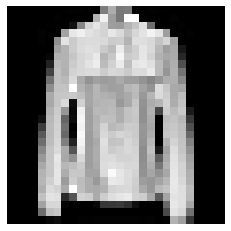

In [ ]:
for img, label in train_fm.take(1):
  print(img.numpy().shape)
  print(label.numpy())
  plt.imshow(img[127,:,:], cmap='gray')
plt.axis('off')
plt.grid(b=None)

Or all one batch, for example the batch number 469

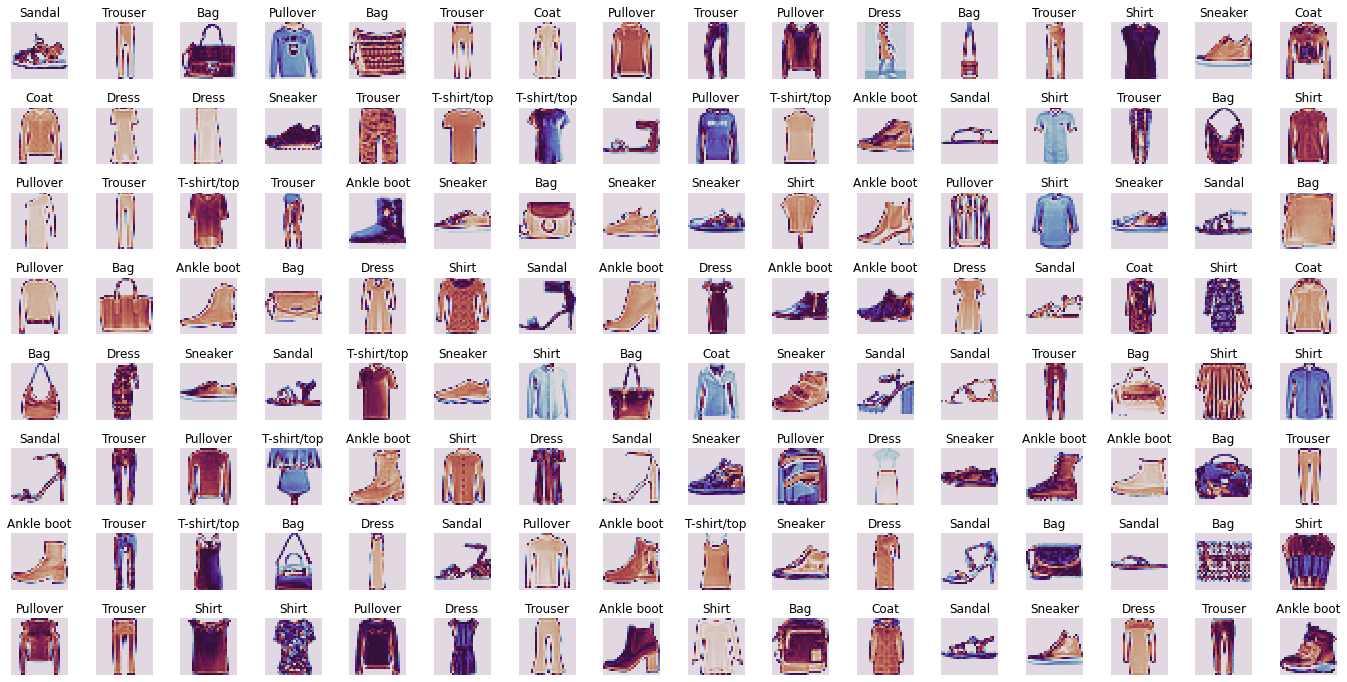

In [ ]:
rows, cols = 8, 16
num = rows*cols
for images, labels in train_fm.take(3):
  i=0
display_grid(images, labels, rows, cols, class_labels)

## Build the Model
Import requisite libraries:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

Clear previous models and generate a seed for reproducibility of results:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

We use zero for the seed value, but any number can be substituted.

---
**Tip** Clearing previous models does not reset the current model to its initial state. to reset a model, just rebuild the input pipeline for the model!

---

Create the [sequential model](https://keras.io/guides/sequential_model/):

In [ ]:
model_1 = Sequential([
  Flatten(input_shape=img_shape),
  Dense(128, activation='relu'),
  Dropout(0.4),
  Dense(10, activation=None)
])

or

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=img_shape))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation=None))

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers. Most layers, such as *Dense*, have parameters that are learned during training.

The first layer in this network is a *Flatten* layer, which transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array
(of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn because it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two Dense layers. Dense layers are fully connected neural layers, which means that all the neurons in a layer are connected to all neurons in the next layer.

The first Dense layer has 128 nodes (or neurons). We add a *Dropout* layer after the first Dense layer to reduce overfitting. The second (and last) layer returns a logits array with length of 10. **Logits** are the outputs of a layer of neurons before the activation function is applied. Each node contains a score that indicates that the current image belongs to one of the ten classes.

**Dropout** is a regularization method that approximates training a large number
of neural networks with different architectures in parallel. During training, some number of layer outputs are randomly ignored or “dropped out,” which has the effect of making the layer look like and be treated like a layer with a different number of nodes

and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Inspect the model:

In [ ]:
model_1.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

## Compile and Train the Model
Compile the model with `SparseCategoricalCrossentropy` loss. Sparse categorical cross- entropy performs well when classes are mutually exclusive. That is, each sample belongs exactly to one class. An advantage of using sparse categorical cross-entropy is that it saves time in memory as well as computation because it uses a single integer for a class rather than a whole vector.

The *from_logits=True* attribute informs the loss function that the output values generated by the model are not normalized. That is, the softmax function has not been applied on them to produce a probability distribution

Compile:

In [ ]:
model.compile(optimizer='adam',
  loss=SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Train the model:


In [ ]:
epochs = 10
history = model.fit(train_fm, epochs=epochs,
                    verbose=1, validation_data=test_fm)

Epoch 1/10
469/469 [==============================] - 5s 5ms/step - loss: 0.6508 - accuracy: 0.7756 - val_loss: 0.4629 - val_accuracy: 0.8360
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4594 - accuracy: 0.8386 - val_loss: 0.4144 - val_accuracy: 0.8527
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4198 - accuracy: 0.8508 - val_loss: 0.3982 - val_accuracy: 0.8573
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3961 - accuracy: 0.8580 - val_loss: 0.3810 - val_accuracy: 0.8642
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3771 - accuracy: 0.8645 - val_loss: 0.3767 - val_accuracy: 0.8641
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3666 - accuracy: 0.8676 - val_loss: 0.3624 - val_accuracy: 0.8705
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3556 - accuracy: 0.8704 - val_loss: 0.3688 - val_accuracy: 0.8674
Epoch 

The model is training with ten epochs. The number of **epochs** is the number of times the learning algorithm works through the entire training dataset. Loss and accuracy are displayed for training and test data. Training loss and accuracy are based on what the model learned during training. Test loss and accuracy are based on new data that the model hasn’t learned upon. So the closer test accuracy is to training accuracy, the more generalizable the model. Of course, we want to have high test accuracy and low test loss.

# Load a TensorFlow Dataset as NumPy
The previous section modeled Fashion-MNIST data based on a Keras dataset. However, we can load data as a TensorFlow dataset (TFDS) and convert it into NumPy arrays for very easy processing. We cover TFDS in detail in a later chapter.

For this experiment, we load the MNIST dataset instead of Fashion-MNIST. We do this because we work with Fashion-MNIST many times in later chapters. So we just want to expose you to another dataset for practice. Once the data is loaded and converted to NumPy, the input pipeline phases are the same as in the previous section.

Create a training set as NumPy arrays in a single batch:

In [ ]:
import tensorflow_datasets as tfds
image_train, label_train = tfds.as_numpy(
    tfds.load(
        'mnist', split='train',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_train), image_train.shape

(numpy.ndarray, (60000, 28, 28, 1))

By using *batch_size=-1*, the full dataset is loaded as a single batch. The *tfds.load()* function loads the dataset. The *tfds.as_numpy()* function converts the dataset to NumPy arrays.

The training set contains 60,000 28 × 28 images. The *1* dimension indicates that the data is grayscale. A **grayscale** image is one in which the only colors are shades of gray. That is, the image only contains luminance (or brightness) information and no color information.

Create the corresponding test set:

In [ ]:
image_test, label_test = tfds.as_numpy(
    tfds.load(
        'mnist', split='test',
        batch_size=-1, as_supervised=True,
        try_gcs=True))
type(image_test), image_test.shape

(numpy.ndarray, (10000, 28, 28, 1))

## Inspect Shapes and Pixel Intensity
Get training shapes:

In [ ]:
image_train.shape, label_train.shape

((60000, 28, 28, 1), (60000,))


Get test shapes:

In [ ]:
image_test.shape, label_test.shape

((10000, 28, 28, 1), (10000,))

Create a function to find the first pixel vector with pixel intensity values as shown in



In [ ]:
def find_intensity(m):
  for i, vector in enumerate(m):
    for j, pixels in enumerate(vector):
      if pixels > 0:
        print (vector)
        return i, j

Invoke the function:


In [ ]:
M = image_train[0]
indx = find_intensity(M)
image_train[0][indx[0]][indx[1]]

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 84]
 [254]
 [101]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


array([84], dtype=uint8)

The nonzero values are pixel intensities.
Display the first pixel with intensity greater than zero:

In [ ]:
image_train[0][indx[0]][indx[1]]

array([84], dtype=uint8)

## Scale
Since NumPy array values are float, divide them by 255 to scale the image pixels:

In [ ]:
train_sc = image_train / 255.0
test_sc = image_test / 255.0

Verify that scaling worked:

In [ ]:
image_train[0][indx[0]][indx[1]], train_sc[0][indx[0]][indx[1]]

(array([84], dtype=uint8), array([0.32941176]))

## Prepare Data for TensorFlow Consumption
Slice NumPy arrays into TensorFlow datasets:


In [ ]:
train_mnds = tf.data.Dataset.from_tensor_slices(
    (image_train, label_train))
test_mnds = tf.data.Dataset.from_tensor_slices(
    (image_test, label_test))

Inspect:

In [ ]:
train_mnds, test_mnds

(<TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 <TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>)

## Build the Consumable Input Pipeline
Initialize parameters, shuffle training data, and batch and prefetch training and test data:

In [ ]:
BATCH_SIZE = 100
SHUFFLE_SIZE = 10000
train_mnist = train_mnds.shuffle(SHUFFLE_SIZE).\
                         batch(BATCH_SIZE).prefetch(1)
test_mnist = train_mnds.batch(BATCH_SIZE).prefetch(1)

Inspect tensors:

In [ ]:
train_mnist, test_mnist

(<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>)

## Build the Model
Earlier, we imported requisite libraries. Since they are already in memory, we don’t need to import them again (assuming that we are using the same notebook).

Get tensor shape:


In [ ]:
np_shape = image_test.shape[1:]
np_shape

(28, 28, 1)

Clear previous models and generate a seed for reproducibility of results:

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
tf.keras.backend.clear_session()

Create the model:

In [ ]:
model = Sequential([
  Flatten(input_shape=np_shape),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])


## Compile and Train the Model
Compile with sparse categorical cross-entropy. Notice that we **don't** set *from_logits=True* because we use *softmax* activation in the output layer of the model to produce a probability distribution from the logits. The **softmax** activation function acts on a vector to increase the difference between the largest component and all others and normalizes the vector to have a sum of 1 so that it can be interpreted as a vector of probabilities. It is used as the last step in classifiers:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model:

In [ ]:
epochs = 3
history = model.fit(train_mnist, epochs=epochs, verbose=1,
                     validation_data=test_mnist)

Epoch 1/3
600/600 [==============================] - 4s 6ms/step - loss: 4.1613 - accuracy: 0.9078 - val_loss: 0.6498 - val_accuracy: 0.9495
Epoch 2/3
600/600 [==============================] - 3s 6ms/step - loss: 0.5280 - accuracy: 0.9536 - val_loss: 0.2732 - val_accuracy: 0.9632
Epoch 3/3
600/600 [==============================] - 4s 6ms/step - loss: 0.2586 - accuracy: 0.9653 - val_loss: 0.1811 - val_accuracy: 0.9698


We train for just three epochs because MNIST is so easy to train.
# Create a Dataset from Files
Create a TensorFlow dataset from files with a Keras utility. We use the Keras utility because it greatly simplifies processing of the flowers dataset. The flowers dataset is public with thousands of flower photos distributed into five classes. Just like the Fashion- MNIST and MNIST examples, we build an input pipeline following similar workflow phases.

## Download and Inspect the Dataset
Import a library for visualization:

In [ ]:
import PIL.Image

The dataset contains several thousand photos of flowers in five subdirectories with one flower photo per class. The directory structure is as follows:
```
  flowers_photos/
    daisy/
    dandelion/
    roses/
    sunflowers/
    tulips/
```
Download data with the `tf.keras.utils.get_file` utility:


In [ ]:
import pathlib
url1 = 'https://storage.googleapis.com/download.tensorflow.org/'
url2 = 'example_images/flower_photos.tgz'
dataset_url = url1 + url2
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


The `tf.keras.utils.get_file` utility downloads a file from a URL if not already in the cache. The `pathlib.Path` function provides a concrete path to the files.
Count the number of flower photos downloaded and available in data_dir:


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print (image_count)

3670


There are 3670 files of flower images.

The `data_dir` path points to directories that each hold a different type of flower. Let’s see the directories:

In [ ]:
dirs = [item.name for item in data_dir.glob('*')\
        if item.name != 'LICENSE.txt']
dirs

['roses', 'sunflowers', 'daisy', 'tulips', 'dandelion']

Each directory contains images of that type of flower. Access some of the files:

In [ ]:
files = tf.data.Dataset.list_files(str(data_dir/'*/*'))
fn = []
for f in files.take(4):
  print(f.numpy()), fn.append(str(f.numpy()))

b'/root/.keras/datasets/flower_photos/sunflowers/9410186154_465642ed35.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/4607183665_3472643bc8.jpg'
b'/root/.keras/datasets/flower_photos/daisy/9611923744_013b29e4da_n.jpg'
b'/root/.keras/datasets/flower_photos/roses/15949087094_a8f565295c_m.jpg'


Display labels from each file:

In [ ]:
from pathlib import Path
label = []
for i in range(4):
  parts = Path(fn[i]).parts
  label.append(parts[5])
  print (parts[5])


sunflowers
dandelion
daisy
roses


Each directory contains images of that type of flower. Here is the first flower in the *daisy* directory:

daisy


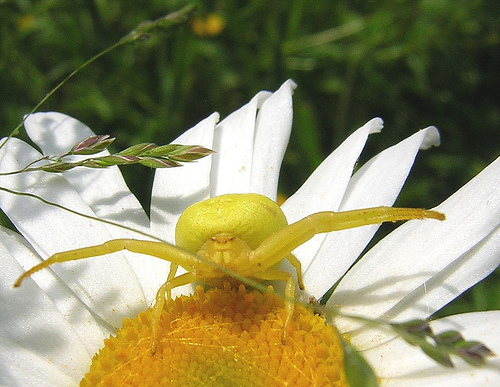

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
parts = Path(daisy[0]).parts
print (parts[5])
PIL.Image.open(str(daisy[0]))

Display the number of daisy images:

In [ ]:
len(daisy)

Let’s display several images from the roses directory. Create a list to hold *roses*:

In [ ]:
roses = list(data_dir.glob('roses/*'))

Grab labels from some of the files:

In [ ]:
label = []
for i in range(4):
  tup = Path(str(roses[i])).parts
  label.append(tup[5])

Display some roses

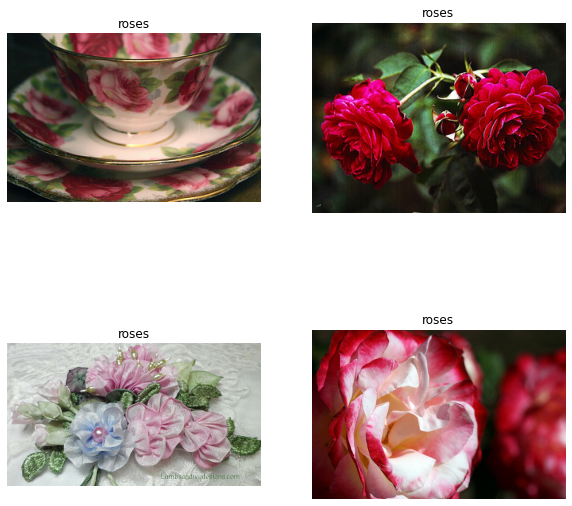

In [ ]:
rows, cols = 2, 2
plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i + 1)
  pix = np.array(PIL.Image.open(str(roses[i])))
  plt.imshow(pix)
  plt.title(label[i])
  plt.axis('off')

Notice that images are not of the same size!

# Parse Data with the tf.keras.preprocessing Utility
The `tf.keras.preprocessing.image_dataset_from_directory` utility offers incredible convenience for loading and parsing images off disk! We show the convenience of the utility in the “Create Training and Test Sets” subsection.

## Set Parameters
Set batch size, image height, and image width:

In [ ]:
BATCH_SIZE = 32
img_height = 180
img_width = 180

We set batch size initially to 32 because it tends to be a good size for many of the datasets with which we work. We set image height and width at 180 because we get good results and the model trains really fast. Feel free to experiment with these parameters.

Our inspection revealed that image size differs. Since TensorFlow models expect images of the same size, we must resize them.
## Create Training and Test Sets
The `tf.keras.preprocessing.image_dataset_from_directory` utility generates a tf.data. Dataset from image files in a directory. The utility is very useful because it allows us to conveniently split, seed, resize, and batch data. Let’s split data into 81% training and 19% test sets. We set this split based on numerous experiments. Of course, you can tweak
the sizes with your own experiment. The combination of the `validation_split` and `subset` parameters determines the train and test splits.

Set aside 81% for training data:


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.19,
  subset='training',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 2973 files for training.


Set aside 19% for test data:

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.19,
  subset='validation',
  seed=0,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 697 files for validation.


Inspect Tensors
Inspect :

In [ ]:
train_ds, test_ds

(<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>)

Take the first batch from the training set and preserve shapes:

In [ ]:
for img, lbl in train_ds.take(1):
  print (img.shape, lbl.shape)
flower_shape, just_img = img.shape[1:],\
                         img.shape[1:3]


(32, 180, 180, 3) (32,)


We take the first batch to help us inspect a batch from the dataset. We preserve the shape of the batch and batch size for use in the model. Batch size is 32, and images are resized to 180 × 180 × 3. The 3 value indicates that images have three channels, which means they are RGB (color). Labels have shape (32,) that corresponds to the 32 scalar images.

## Get Class Names
We already identified the classes from the directory names. But we can now access them with the `class_names` method:


In [ ]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

## Display Examples
Take a batch from the training set and plot some images

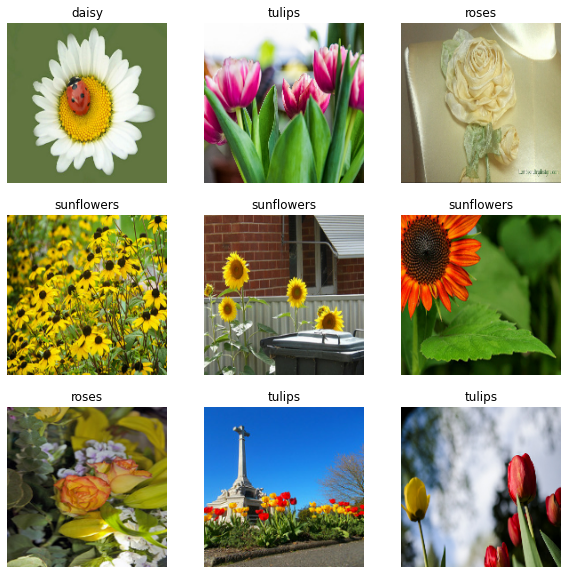

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## Scale the Data
As noted earlier in the chapter, a pixel is represented by 256 values. So RGB channel values are in the [0, 255] range. Since neural networks work better with small values, data is typically scaled to be in the [0, 1] range.

Create a function to scale images:

In [ ]:
def format_image(image, label):
  image = tf.image.resize(image, just_img) / 255.0
  return image, label


The function is used when we configure the input pipeline.
## Configure the Dataset for Performance
Use buffered prefetching to get data from disk to mitigate I/O issues. Cache data to keep images in memory after they’re loaded off disk. Caching saves operations like file opening and data reading from being executed during each epoch.
## Build the Input Pipeline
Scale, shuffle the training set, and cache and prefetch train and test sets:


In [ ]:
SHUFFLE_SIZE = 100

train_fds = train_ds.map(format_image).\
  shuffle(SHUFFLE_SIZE).cache().prefetch(1)
test_fds = test_ds.map(format_image).\
  cache().prefetch(1)

---
**Note** since training and test data have already been batched by the utility, do not batch when building the input pipeline!

---

## Build the Model
Since we are working with large color images, we need to build a convolutional neural network (CNN) model to garner respectable performance because flower images are color with higher pixel counts.

We need additional libraries for a CNN:

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Get the number of classes for use in the model:

In [ ]:
num_classes = len(class_names)
num_classes

5

Clear any previous models and generate a random seed:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

Create a multilayer CNN

In [ ]:
flower_model = tf.keras.Sequential([
  Conv2D(32, 3, activation='relu',
         input_shape=flower_shape),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

The first layer scales the data. The second layer contains 32 neurons with a 3 × 3 convolutional kernel (or filter). Activation is relu. The third layer uses maximum pooling to reduce the spatial size of a layer by just keeping the maximum values. As such,
the pooling layer reduces image dimensionality without losing important features or patterns. The next four layers repeat the same pattern as the second and third layers. The Flatten layer converts pooled data into a single column because a Dense layer expects data in this form. The final Dense layer enables classification and prediction.

Compile and Train the Model
Compile with `SparseCategoricalCrossentropy()`:


In [ ]:
flower_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

Since softmax is applied to outputs, we **don’t** set from_logits=True. Train the model:

In [ ]:
history = flower_model.fit(
    train_fds,
    validation_data=test_fds,
    epochs=5)


Epoch 1/5
93/93 [==============================] - 39s 65ms/step - loss: 1.2708 - accuracy: 0.4531 - val_loss: 1.1033 - val_accuracy: 0.5882
Epoch 2/5
93/93 [==============================] - 4s 46ms/step - loss: 0.9840 - accuracy: 0.6102 - val_loss: 1.0079 - val_accuracy: 0.6255
Epoch 3/5
93/93 [==============================] - 4s 46ms/step - loss: 0.8173 - accuracy: 0.6885 - val_loss: 0.9554 - val_accuracy: 0.6456
Epoch 4/5
93/93 [==============================] - 4s 46ms/step - loss: 0.5850 - accuracy: 0.7841 - val_loss: 0.9279 - val_accuracy: 0.6829
Epoch 5/5
93/93 [==============================] - 4s 46ms/step - loss: 0.4214 - accuracy: 0.8507 - val_loss: 1.0781 - val_accuracy: 0.6686


The model is overfitting because validation accuracy is low compared to training accuracy. But we have not made any attempt to tune the model. In the next chapter, we explore a powerful technique to mitigate overfitting.

# Get Flowers from Google Cloud Storage
We demonstrated input pipelining with data from memory and from files. We can also pipeline data from cloud storage. Flowers data is hosted in a public bucket on Google Cloud Storage (GCS). So we can grab flower files from GCS. We can read flowers as JPEG files or as TFRecord files. For data modeling, we use TFRecord files. For optimal performance, we read from multiple TFRecord files at once. The TFRecord format is a simple format for storing a sequence of binary records. A TFRecord file contains a sequence of records, which can only be read sequentially.

## Read Flowers as JPEG Files and Perform Simple Processing
Read JPEG files based on a GCS pattern:


In [ ]:
GCS_PATTERN = 'gs://flowers-public/*/*.jpg'
filenames = tf.io.gfile.glob(GCS_PATTERN)

GCS_PATTERN is a glob pattern that supports the “*” and “?” wildcards. **Globs** (also known as glob patterns) are patterns that can expand a wildcard pattern into a list of pathnames that match the given pattern.
Get the number of JPEG images:

In [ ]:
num_images = len(filenames)
print ('Pattern matches {} images.'.format(num_images))

Pattern matches 3670 images.


Create a dataset of filenames from GCS_PATTERN and peruse its contents:

In [ ]:
filenames_ds = tf.data.Dataset.list_files(GCS_PATTERN)
for filename in filenames_ds.take(5):
  print (filename.numpy().decode('utf-8'))


gs://flowers-public/daisy/4407065098_ef25f1ccac_n.jpg
gs://flowers-public/tulips/3524204544_7233737b4f_m.jpg
gs://flowers-public/sunflowers/4746638094_f5336788a0_n.jpg
gs://flowers-public/sunflowers/13117907313_86c99c6441.jpg
gs://flowers-public/dandelion/13916196427_50a611008f.jpg


We need the data in (image, label) tuples to work with the images and labels independently. So create a function to return a dataset of (image, label) tuples

In [ ]:
def decode_jpeg_and_label(filename):
  bits = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.strings.split(
      tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

Map the function to each filename to create a dataset of (image, label) tuples:

In [ ]:
ds = filenames_ds.map(decode_jpeg_and_label)

Peruse:

In [ ]:
for image, label in ds.take(5):
  print (image.numpy().shape,
         label.numpy().decode('utf-8'))

(333, 500, 3) sunflowers
(281, 500, 3) daisy
(331, 500, 3) daisy
(240, 159, 3) dandelion
(334, 500, 3) daisy


Display an image:

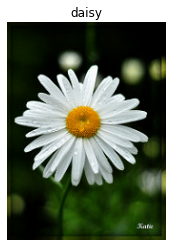

In [ ]:
for img, lbl  in ds.take(1):
  plt.axis('off')
  plt.title(lbl.numpy().decode('utf-8'))
  fig = plt.imshow(img)


Although we don’t train with this dataset, let’s see how to convert text labels to encoded labels

In [ ]:
for img, lbl in ds.take(1):
  label = lbl.numpy().decode('utf-8')
matches = tf.stack([tf.equal(label, s)\
                    for s in class_names], axis=-1)
one_hot = tf.cast(matches, tf.float32)
print (matches.numpy(), one_hot.numpy())
new_label = tf.math.argmax(one_hot)
new_label.numpy()

[False False  True False False] [0. 0. 1. 0. 0.]


2

Take a label. Compare it against the class name list to find its position in the list. Create a one-hot vector. Convert the one-hot vector into a label tensor. We don’t train with this dataset because it is not the way to model complex data from GCS. But it is a simple way to load and inspect the data.
# Read and Process Flowers as TFRecord Files
The best way to model complex data from GCS is as TFRecord files. A TFRecord file stores data as a sequence of binary strings. Binary strings are very efficient to process.
## Read TFRecord Files
Read TFRecord files based on a GCS pattern:


In [ ]:
piece1 = 'gs://flowers-public/'
piece2 = 'tfrecords-jpeg-192x192-2/*.tfrec'
TFR_GCS_PATTERN = piece1 + piece2
tfr_filenames = tf.io.gfile.glob(TFR_GCS_PATTERN)

Get the number of buckets:

In [ ]:
num_images = len(tfr_filenames)
print ('Pattern matches {} image buckets.'.format(num_images))

Pattern matches 16 image buckets.


We grabbed 16 buckets. Since there are 3670 flower files, 15 buckets contain 230 images (15 × 230 = 3,450), and the final bucket contains 220 images. Add 3,450 to 220 to get 3,670.

Display a file:

In [ ]:
filenames_tfrds = tf.data.Dataset.list_files(TFR_GCS_PATTERN)
for filename in filenames_tfrds.take(1):
  print (filename.numpy())

b'gs://flowers-public/tfrecords-jpeg-192x192-2/flowers10-230.tfrec'


Set Parameters for Training
Set parameters for image resizing, pipelining, and number of epochs:


In [ ]:
IMAGE_SIZE = [192, 192]
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
SHUFFLE_SIZE = 100
EPOCHS = 5

Use AUTOTUNE to prompt the tf.data runtime, which tunes the value dynamically at runtime.

---
**Note** autotune is experimental, which means that the operation may change in the future.

---
Set validation split and class labels:


In [ ]:
VALIDATION_SPLIT = 0.19
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Create data splits, validation steps, and steps per epoch as shown in Listing 1-8.

In [ ]:
split = int(len(tfr_filenames) * VALIDATION_SPLIT)
training_filenames = tfr_filenames[split:]
validation_filenames = tfr_filenames[:split]
print ('Splitting dataset into {} training files and {}'
        ' validation files'.format(
            len(tfr_filenames), len(training_filenames),
            len(validation_filenames)), end = ' ')
print ('with a batch size of {}.'.format(BATCH_SIZE))
validation_steps = int(3670 // len(tfr_filenames) *\
                       len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(tfr_filenames) *\
                      len(training_filenames)) // BATCH_SIZE
print ('There are {} batches per training epoch and {} '\
       'batches per validation run.'\
       .format(BATCH_SIZE, steps_per_epoch, validation_steps))

Splitting dataset into 16 training files and 13 validation files with a batch size of 64.
There are 64 batches per training epoch and 46 batches per validation run.


# Create Functions to Load and Process TFRecord Files
Create a function to parse a TFRecord file

In [ ]:
def read_tfrecord(example):
  features = {
      'image': tf.io.FixedLenFeature([], tf.string),
      'class': tf.io.FixedLenFeature([], tf.int64)
  }
  example = tf.io.parse_single_example(example, features)
  image = tf.image.decode_jpeg(example['image'], channels=3)
  image = tf.cast(image, tf.float32) / 255.0
  image = tf.reshape(image, [*IMAGE_SIZE, 3])
  class_label = example['class']
  return image, class_label

The function accepts a TFRecord file. A dictionary holds datatypes common to TFRecords. The tf.string datatype converts the image to byte strings (list of bytes). The
tf.int64 converts the class label to a 64-bit integer scalar value. The TFRecord file is parsed into (image, label) tuples. The image element, a JPEG-encoded image, is decoded into a uint8 image tensor. The image tensor is scaled to the [0, 1] range for faster training. It is then reshaped to a standard size for model consumption. The class label element is cast to a scalar.

Create a function to load TFRecord files as `tf.data.Dataset`

In [ ]:
def load_dataset(filenames):
  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False
  dataset = tf.data.TFRecordDataset(
      filenames, num_parallel_reads=AUTO)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

The function accepts TFRecord files. For optimal performance, code is included
to read from multiple TFRecord files at once. The options setting allows order-altering optimizations. As such, n files are read in parallel, and data order is disregarded in favor of reading speed.

Create a function to build an input pipeline from TFRecord files

In [ ]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache()
  if train:
    dataset = dataset.repeat()
    dataset = dataset.shuffle(SHUFFLE_SIZE)
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTO)
  return dataset

The function accepts TFRecord files and calls the load_dataset function. The function continues by building an input pipeline by caching, repeating, shuffling, batching, and prefetching the dataset. Repeating and shuffling are only mapped to training data to follow best practices for a Keras dataset.

## Create Training and Test Sets
Instantiate the datasets:


In [ ]:
training_dataset = get_batched_dataset(
    training_filenames, train=True)
validation_dataset = get_batched_dataset(
    validation_filenames, train=False)
training_dataset, validation_dataset


(<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>)

Display an image and preserve the shape for the model:

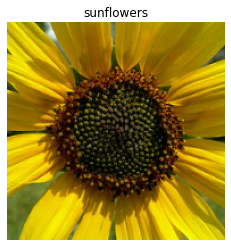

In [ ]:
for img, lbl in training_dataset.take(1):
  plt.axis('off')
  plt.title(CLASSES[lbl[0].numpy()])
  fig = plt.imshow(img[0])
  tfr_flower_shape = img.shape[1:]


## Model Data
Clear and seed:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)


Create the model as shown

In [ ]:
tfr_model = Sequential([
  Conv2D(32, (3, 3), activation = 'relu',
         input_shape=tfr_flower_shape),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(num_classes, activation='sigmoid')
])

Inspect

In [ ]:
tfr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

Compile:

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)
tfr_model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])


Train:

In [ ]:
history = tfr_model.fit(training_dataset, epochs=EPOCHS,
                    verbose=1, steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=validation_dataset)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


46/46 [==============================] - 10s 169ms/step - loss: 1.3748 - accuracy: 0.3906 - val_loss: 1.2042 - val_accuracy: 0.4844
Epoch 2/5
46/46 [==============================] - 7s 157ms/step - loss: 1.0687 - accuracy: 0.5774 - val_loss: 1.0805 - val_accuracy: 0.6109
Epoch 3/5
46/46 [==============================] - 7s 150ms/step - loss: 0.9341 - accuracy: 0.6335 - val_loss: 1.0413 - val_accuracy: 0.5813
Epoch 4/5
46/46 [==============================] - 7s 150ms/step - loss: 0.8234 - accuracy: 0.6858 - val_loss: 0.9759 - val_accuracy: 0.6187
Epoch 5/5
46/46 [==============================] - 7s 150ms/step - loss: 0.7070 - accuracy: 0.7337 - val_loss: 0.9850 - val_accuracy: 0.6344


## Summary
We built ML input pipeline examples from three types of data. The first experiments built pipelines from data loaded into memory. We then built a pipeline from external files. The final experiment built a pipeline from cloud storage.